# `Import libraries`

In [1]:
# Main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import missingno as msno

# Sklearn
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn_features.transformers import DataFrameSelector
from sklearn import utils

# Models
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost

# `Load the DataSet`

In [2]:
# Read the csv file 
file_path = os.path.join(os.getcwd(),'train.csv')
df_titanic = pd.read_csv(file_path)

# Show the head of the DF
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
# Show some info about the DF (nulls and DataTypes)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Show some statistics about the DataSet
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# check nulls
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

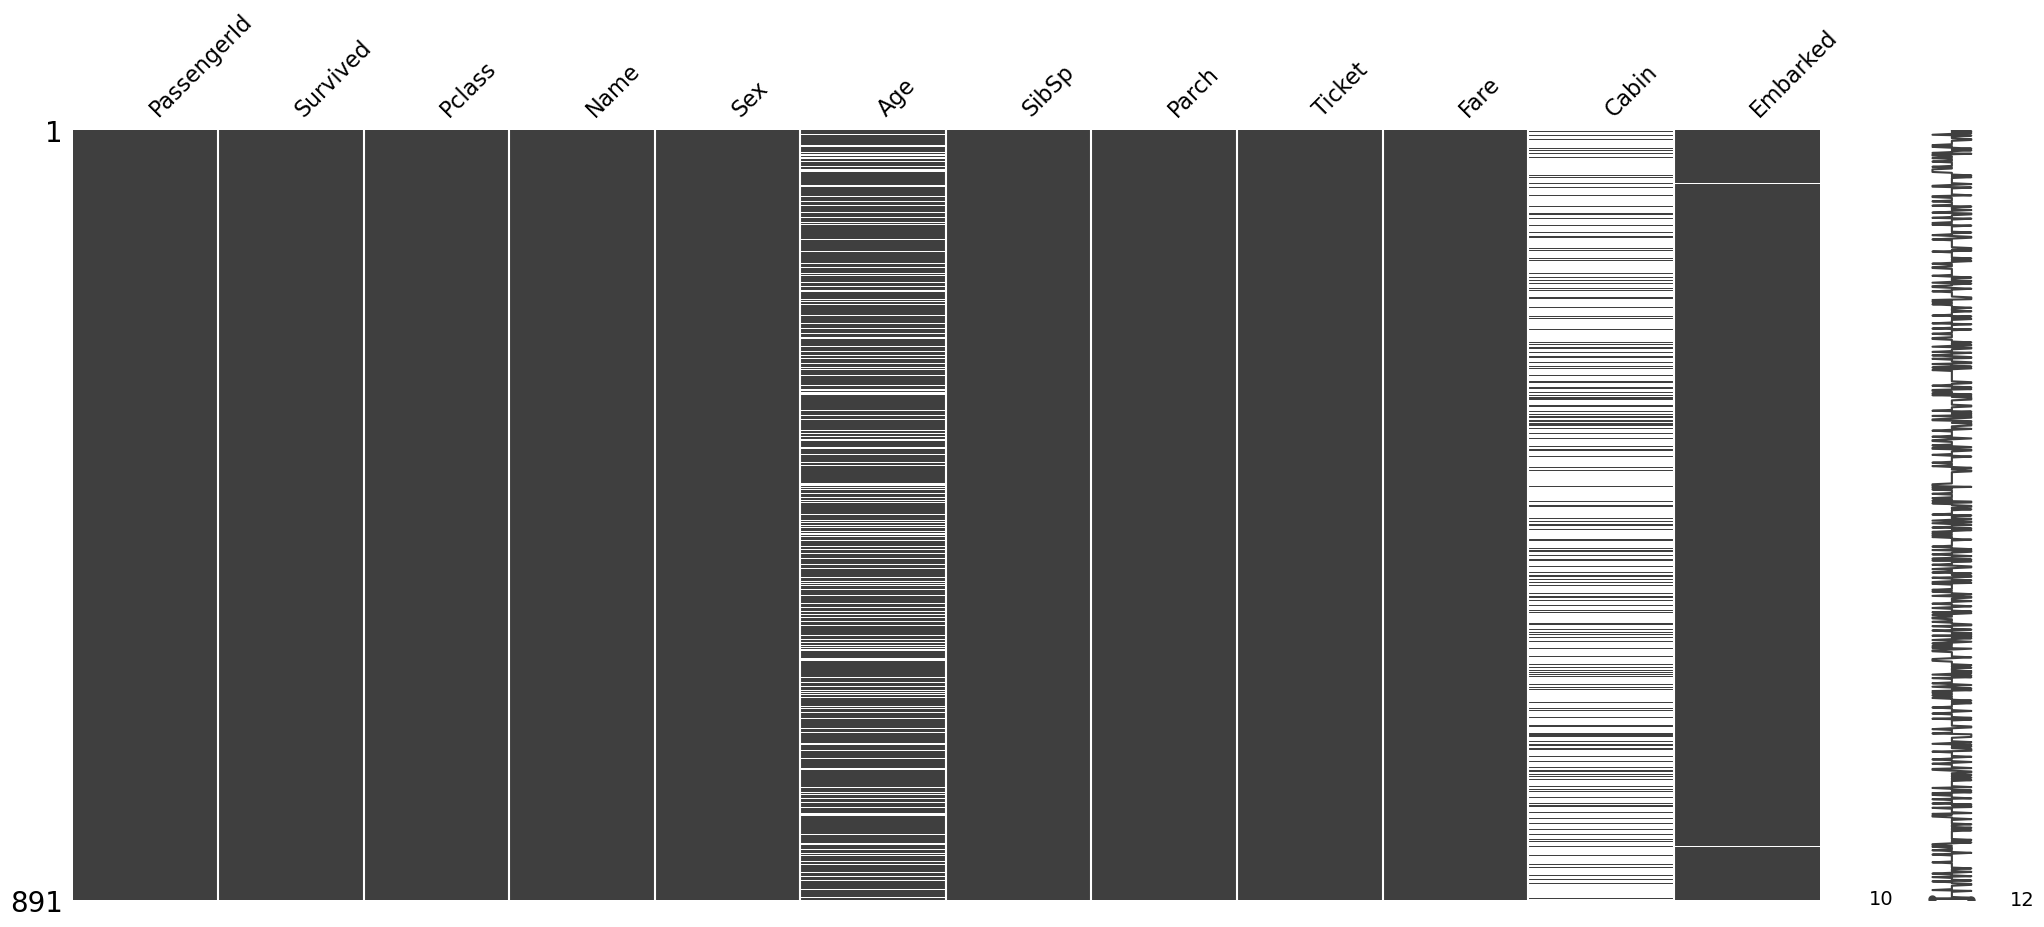

In [7]:
# check nulls using missingno
msno.matrix(df_titanic)

* > `Comment: It seems that the DataSet contains 891 instances and the are 177 nulls in Age column, 687 nulls in Cabin column and only 2 nulls in Embarked column. There are 5 columns int64, 5 columns Object  and only 2 columns float64 as they are continuous numerical features except the (Name, Sex, Ticket, Cabin, Embarked) columns which are nominal categorical feature.`

# `Exploratory Data Analysis (EDA)`

## `Univariate Visualization`

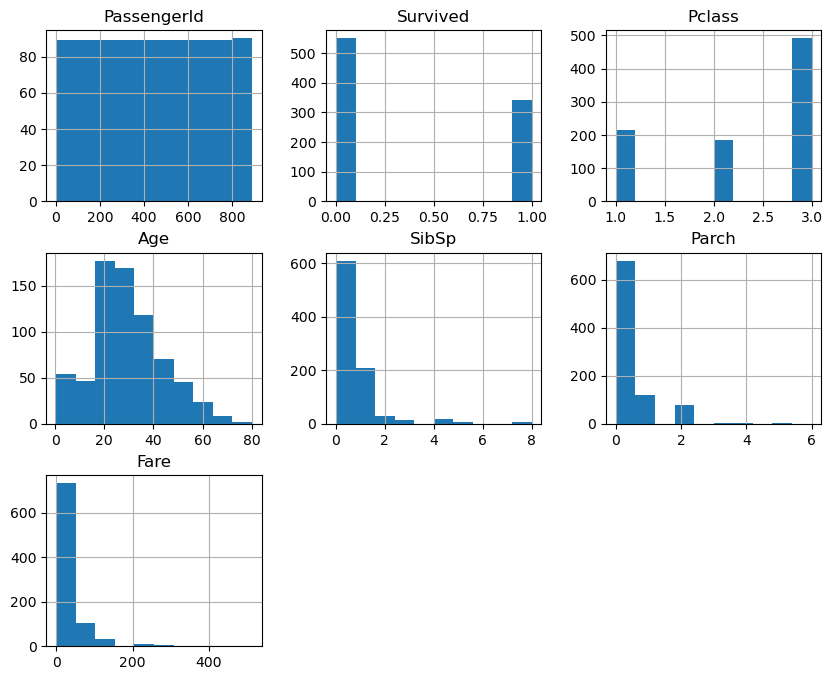

In [8]:
# plot histogram for DataSet
df_titanic.hist(figsize=(10, 8))
plt.show()

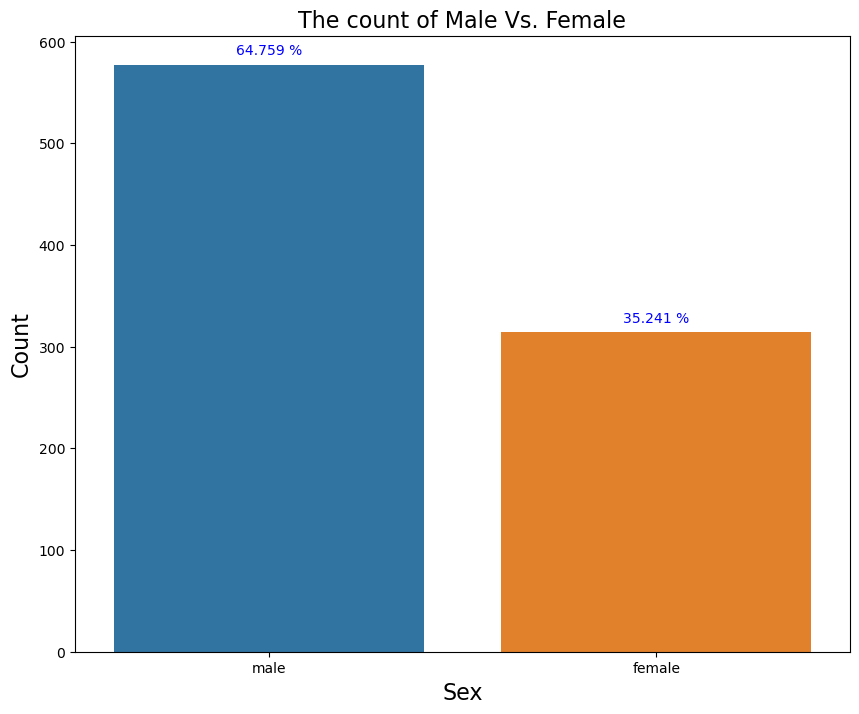

In [9]:
# Check the distribution of male & females in the DataSet
replicates = df_titanic['Sex'].value_counts()

# plotting
plt.figure(figsize=(10, 8))
sns.countplot(x='Sex', data=df_titanic, order=replicates.index)
plt.title('The count of Male Vs. Female', fontsize=16, c='k')
plt.xlabel('Sex', fontsize=16, c='k')
plt.ylabel('Count', fontsize=16, c='k')

for i in range (len(replicates)):
    each_count = replicates.values[i]
    each_text = f'{each_count*100/len(df_titanic):.3f} %'
    plt.text(x=i, y=each_count+10, s=each_text,ha='center', c='b')
    
plt.show()

* > `Comment: It seems that the percentage of male (64.76%) is almost twice than the percentage of females (35.24%).`

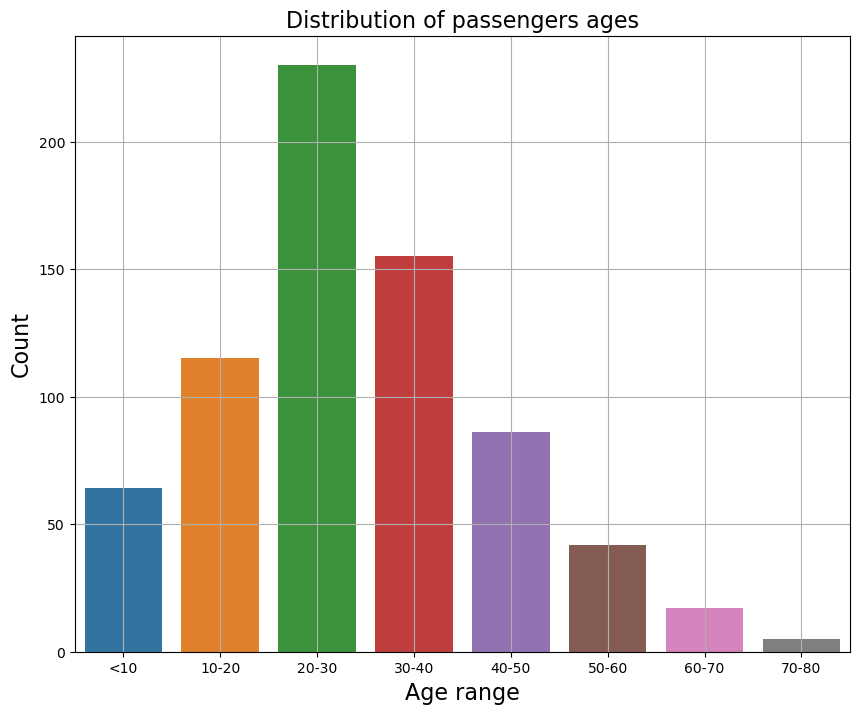

In [10]:
# Check the distribution of Age in the DataSet
age_bins = pd.cut(x=df_titanic['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                  labels=['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.figure(figsize=(10, 8))
sns.countplot(x=age_bins)
plt.title('Distribution of passengers ages', fontsize=16, c='k')
plt.xlabel('Age range', fontsize=16, c='k')
plt.ylabel('Count', fontsize=16, c='k')
plt.grid('on')
plt.show()

* > `Comment: It seems that most of passengers are in age between 20 and 30 years old`

## `Bivariate Visualization`

<AxesSubplot:xlabel='Sex', ylabel='Age'>

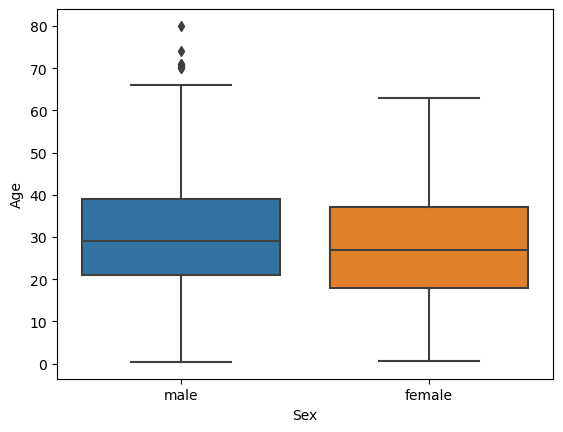

In [11]:
# Show the boxplot of age according to the gender
sns.boxplot(x=df_titanic['Sex'], y=df_titanic['Age'])

* > `Comment: It seems that distribution of males and females is almost the same at the Age, and there is an outlier for the boxplot of males`

# `Check the Correlation between Features and Target`

In [12]:
# using pearson correlation
df_titanic.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

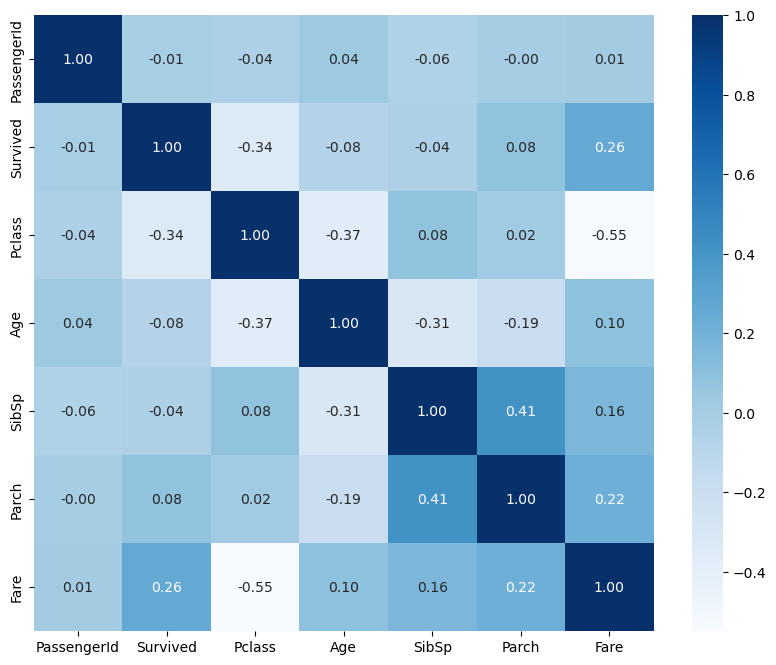

In [13]:
# Show the correlation to (Survived) using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap( df_titanic.corr(), cmap=plt.get_cmap('Blues'), annot=True, fmt='.2f')
plt.show()

* > `Comment: It seems that the most correlated features are (Pclass and Fare) and the least correlated features are (PassengerId and SibSp)`

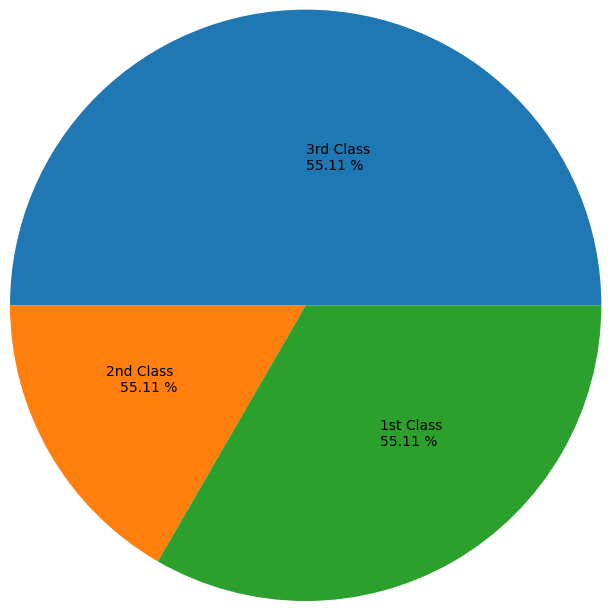

In [14]:
# Show the percentage of each class
value = []
for i in (df_titanic['Pclass'].value_counts().values):
    value.append(f'{i*100/len(df_titanic):.2f} %')
# plotting using pie chart  
plt.pie(x=df_titanic['Pclass'].unique(), radius=2, labeldistance=0.5, 
        labels=[f'3rd Class \n{value[0]}', f'2nd Class \n{value[0]}', f'1st Class \n{value[0]}'])
plt.show()

# `Split the DataSet`

In [15]:
X = df_titanic.drop(['Survived', 'Name', 'Parch', 'Ticket', 'Cabin', 'PassengerId','SibSp', 'Embarked'], axis=1)
y = df_titanic['Survived']

# `Dealing with nulls`

In [16]:
# Seperate the columns according to types (numerical and categorical)
num_cols = [col for col in X.columns if X[col].dtype in ['int64', 'int32', 'float64', 'float32']]
categ_cols = [col for col in X.columns if X[col].dtype not in ['int64', 'int32', 'float64', 'float32']]


# `Pipeline for Features`

In [17]:
# pipeline for all features (numrical and categorical)
num_pipeline = Pipeline(steps=[('selector', DataFrameSelector(num_cols)), 
                               ('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler())])

categ_pipeline = Pipeline(steps=[('selector', DataFrameSelector(categ_cols)),
                                 ('imputer', SimpleImputer(strategy='constant', fill_value='S')),
                                 ('ohe', OneHotEncoder(sparse=False))])

total_pipeline = FeatureUnion(transformer_list=[('num', num_pipeline), ('categ', categ_pipeline)])

X_train = total_pipeline.fit_transform(X)

# `Building Models`
##### `Evaluation Metric: Accuracy`

### `1. LogisticRegression`

In [18]:
logit_clf = LogisticRegression(C=0.7, random_state=42, max_iter=1000)
logit_clf.fit(X_train, y)

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

In [19]:
# Check accuracy of LogisticRegresstion model using (cross_val_score)
acc_logit = cross_val_score(estimator=logit_clf,X=X_train, y=y, cv=5, scoring='accuracy')

acc_mean_logit = acc_logit.mean()
print(f'The accuracy for LogsiticRegression model {acc_mean_logit:0.3f}')
print('*'*20)

# Get prediction using (cross_val_predict)
y_pred_logit = cross_val_predict(estimator=logit_clf,X=X_train, y=y, cv=5, method='predict')
print(f'after prediction using LogsiticRegression --> {accuracy_score(y, y_pred_logit):0.3f}')

The accuracy for LogsiticRegression model 0.786
********************
after prediction using LogsiticRegression --> 0.786


## `Tuning LogisticRegression Model`

In [20]:
# Tuning LogisticRegression model using RandomSearchCV
params_best_logit = {'C':[0.481, 0.47, 0.478, 0.48], 'max_iter':[1040, 1050, 1055]}
search_random_logit = RandomizedSearchCV(estimator=logit_clf, param_distributions=params_best_logit, n_iter=10, 
                   scoring='accuracy', cv=5, verbose=6, random_state=42)
search_random_logit.fit(X_train, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .............C=0.48, max_iter=1050;, score=0.788 total time=   0.0s
[CV 2/5] END .............C=0.48, max_iter=1050;, score=0.781 total time=   0.0s
[CV 3/5] END .............C=0.48, max_iter=1050;, score=0.787 total time=   0.0s
[CV 4/5] END .............C=0.48, max_iter=1050;, score=0.775 total time=   0.0s
[CV 5/5] END .............C=0.48, max_iter=1050;, score=0.798 total time=   0.0s
[CV 1/5] END .............C=0.48, max_iter=1040;, score=0.788 total time=   0.0s
[CV 2/5] END .............C=0.48, max_iter=1040;, score=0.781 total time=   0.0s
[CV 3/5] END .............C=0.48, max_iter=1040;, score=0.787 total time=   0.0s
[CV 4/5] END .............C=0.48, max_iter=1040;, score=0.775 total time=   0.0s
[CV 5/5] END .............C=0.48, max_iter=1040;, score=0.798 total time=   0.0s
[CV 1/5] END ............C=0.481, max_iter=1040;, score=0.788 total time=   0.0s
[CV 2/5] END ............C=0.481, max_iter=1040;

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=0.7, max_iter=1000,
                                                random_state=42),
                   param_distributions={'C': [0.481, 0.47, 0.478, 0.48],
                                        'max_iter': [1040, 1050, 1055]},
                   random_state=42, scoring='accuracy', verbose=6)

In [21]:
# Show best parameters for the LogisticRegression model
search_random_logit.best_params_

{'max_iter': 1050, 'C': 0.48}

In [22]:
best_logit = search_random_logit.best_estimator_
best_logit.fit(X_train, y)

LogisticRegression(C=0.48, max_iter=1050, random_state=42)

In [23]:
# Check accuracy of tuned LogisticRegression model using (cross_val_score)
acc_best_logit = cross_val_score(estimator=best_logit, X=X_train, y=y, cv=6, scoring='accuracy')

acc_best_mean_logit = acc_best_logit.mean()
print(f'The accuracy for tuned LogsiticRegression model {acc_best_mean_logit:0.3f}')
print('*'*20)

# # Get prediction using (cross_val_predict)
y_pred_best_logit = cross_val_predict(estimator=best_logit, X=X_train, y=y, cv=5, method='predict')
print(f'after prediction using tuned LogsiticRegression --> {accuracy_score(y, y_pred_best_logit):0.3f}')

The accuracy for tuned LogsiticRegression model 0.790
********************
after prediction using tuned LogsiticRegression --> 0.786


## `3. XGBoost`

In [24]:
# Classification using XGBoost API
xgb_clf = xgboost.XGBClassifier(n_estimators=5, max_depth=4, learning_rate=0.01, subsample=0.8, random_state=42)
xgb_clf.fit(X_train, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [25]:
# Check accuracy of XGBoost model using (cross_val_score)
acc_xgb = cross_val_score(estimator=xgb_clf,X=X_train, y=y, cv=6, scoring='accuracy')

acc_mean_xgb = acc_xgb.mean()
print(f'The accuracy for XGBoost model {acc_mean_xgb:0.3f}')
print('*'*20)

# # Get prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_clf,X=X_train, y=y, cv=5, method='predict')
print(f'after prediction using XGBoost --> {accuracy_score(y, y_pred_xgb):0.3f}')

The accuracy for XGBoost model 0.616
********************
after prediction using XGBoost --> 0.616


## `Tuning XGBoost`

In [26]:
# Tuning XGBoost using RandomSearchCV
params_best_xgb = {'n_estimators':[13, 17, 14, 15, 16], 'max_depth':[2, 3, 4, 5, 6, 7], 
                   'learning_rate':[0.81, 0.808, 0.809, 0.811], 'subsample':[0.8, 0.8041, 0.8039, 0.8037, 0.8038]}
search_random_xgb = RandomizedSearchCV(estimator=xgb_clf, param_distributions=params_best_xgb, random_state=42)
search_random_xgb.fit(X_train, y)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.01...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                   

In [27]:
# Show best parameters for XGBoost API
search_random_xgb.best_params_

{'subsample': 0.8038,
 'n_estimators': 16,
 'max_depth': 3,
 'learning_rate': 0.809}

In [28]:
best_xgb = search_random_xgb.best_estimator_
best_xgb.fit(X_train, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.809, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=16, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
# Check accuracy of tuned XGBoost model using (cross_val_score)
acc_best_xgb = cross_val_score(estimator=best_xgb,X=X_train,y=y, cv=6, scoring='accuracy')

acc_best_mean_xgb = acc_best_xgb.mean()
print(f'The accuracy for tuned XGBoost model {acc_best_mean_xgb:0.3f}')
print('*'*20)

# # Get prediction using (cross_val_predict)
y_pred_best_xgb = cross_val_predict(estimator=best_xgb,X=X_train,y=y, cv=5, method='predict')
print(f'after prediction using tuned XGBoost --> {accuracy_score(y, y_pred_best_xgb):0.3f}')

The accuracy for tuned XGBoost model 0.826
********************
after prediction using tuned XGBoost --> 0.831


## `AdaBoost`

In [30]:
Adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                  n_estimators=100, learning_rate=0.5, random_state=42)
Adaboost_clf.fit(X_train, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [31]:
# using cross validation for prediction and evaluation
# check accuraccy of AdaBoost model
acc_scores_Adaboost = cross_val_score(estimator=Adaboost_clf, X=X_train, y=y, cv=5, scoring='accuracy')
print(f"Accuracy (mean) score for AdaBoost model is: {acc_scores_Adaboost.mean():.3f}")
print('*'*20)

# Prediction using cross validation
y_pred_Adaboost = cross_val_predict(estimator=Adaboost_clf, X=X_train, y=y, cv=5, method='predict')
print(f"Accuracy (mean) score for AdaBoost model prediction is: {accuracy_score(y, y_pred_Adaboost):.3f}")

Accuracy (mean) score for AdaBoost model is: 0.787
********************
Accuracy (mean) score for AdaBoost model prediction is: 0.787


## `Tuning AdaBoost`

In [32]:
# Tuning AdaBoost model using GridSearchCV
params_best_adaboost = {'n_estimators':[95, 94, 93, 97], 'learning_rate':[0.1, 0.09, 0.095, 0.101, 0.102]}
search_grid_adaboost = GridSearchCV(estimator=Adaboost_clf, param_grid=params_best_adaboost, 
                                    cv=5, verbose=6, scoring='accuracy')
search_grid_adaboost.fit(X_train, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.1, n_estimators=95;, score=0.771 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=95;, score=0.792 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=95;, score=0.815 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=95;, score=0.787 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=95;, score=0.798 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=94;, score=0.777 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=94;, score=0.792 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=94;, score=0.809 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=94;, score=0.787 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=94;, score=0.798 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=93;, score=0.771 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=93

[CV 5/5] END learning_rate=0.102, n_estimators=97;, score=0.792 total time=   0.0s


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                                          learning_rate=0.5, n_estimators=100,
                                          random_state=42),
             param_grid={'learning_rate': [0.1, 0.09, 0.095, 0.101, 0.102],
                         'n_estimators': [95, 94, 93, 97]},
             scoring='accuracy', verbose=6)

In [33]:
# Show the best parameters for AdaBoost model
search_grid_adaboost.best_params_

{'learning_rate': 0.095, 'n_estimators': 94}

In [34]:
best_adaboost = search_grid_adaboost.best_estimator_
best_adaboost.fit(X_train, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.095, n_estimators=94, random_state=42)

In [35]:
# Check accuracy of tuned AdaBoost model using (cross_val_score)
acc_best_adaboost = cross_val_score(estimator=best_adaboost,X=X_train,y=y, cv=6, scoring='accuracy')

acc_best_mean_adaboost = acc_best_adaboost.mean()
print(f'The accuracy for tuned AdaBoost model {acc_best_mean_adaboost:0.3f}')
print('*'*20)

# # Get prediction using (cross_val_predict)
y_pred_best_adaboost = cross_val_predict(estimator=best_adaboost,X=X_train,y=y, cv=5, method='predict')
print(f'after accuracy using tuned AdaBoost --> {accuracy_score(y, y_pred_best_adaboost):0.3f}')

The accuracy for tuned AdaBoost model 0.799
********************
after accuracy using tuned AdaBoost --> 0.801


## `Random Forest`

In [36]:
# Classification using Random Forest
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=3, max_leaf_nodes=20, criterion='gini', 
                                    max_features=1, max_samples=0.8,random_state=42)
forest_clf.fit(X_train, y)

RandomForestClassifier(max_depth=3, max_features=1, max_leaf_nodes=20,
                       max_samples=0.8, random_state=42)

In [37]:
# using cross validation for prediction and evaluation
# Check accuracy of Random Forest model before tuning
acc_scores_forest = cross_val_score(estimator=forest_clf, X=X_train, y=y, cv=5, scoring='accuracy')
print(f"Accuracy (mean) score for Random Forest is: {acc_scores_forest.mean():.3f}")
print('*'*20)

# Prediction using cross validation
y_pred_forest = cross_val_predict(estimator=forest_clf, X=X_train, y=y, cv=5, method='predict')
print(f"Accuracy of Random Forest for prediction is: {accuracy_score(y, y_pred_forest):.3f}")

Accuracy (mean) score for Random Forest is: 0.799
********************
Accuracy of Random Forest for prediction is: 0.799


## `Tuning Random Forest`

In [38]:
# Tuning Random Forest model using RandomSearchCV
params_best_forest = {'n_estimators':np.arange(533, 535, 1),
                      'max_depth':[9, 7, 8],
                      'max_leaf_nodes':[45, 46, 48, 47], 
                      'criterion':['gini', 'entropy'], 
                      'max_features':[1, 2, 3, 4],
                      'max_samples':[0.749,0.748, 0.75]}

search_random_forest = RandomizedSearchCV(estimator=forest_clf, param_distributions=params_best_forest, cv=5, 
                                          random_state=42, scoring='accuracy', verbose=6, n_iter=30)
search_random_forest.fit(X_train, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=47, max_samples=0.749, n_estimators=533;, score=0.827 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=47, max_samples=0.749, n_estimators=533;, score=0.837 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=47, max_samples=0.749, n_estimators=533;, score=0.876 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=47, max_samples=0.749, n_estimators=533;, score=0.826 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=47, max_samples=0.749, n_estimators=533;, score=0.876 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=7, max_features=1, max_leaf_nodes=47, max_samples=0.75, n_estimators=533;, score=0.821 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=7, max_features=1, max_l

[CV 2/5] END criterion=entropy, max_depth=7, max_features=3, max_leaf_nodes=48, max_samples=0.748, n_estimators=534;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=3, max_leaf_nodes=48, max_samples=0.748, n_estimators=534;, score=0.848 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=3, max_leaf_nodes=48, max_samples=0.748, n_estimators=534;, score=0.809 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=3, max_leaf_nodes=48, max_samples=0.748, n_estimators=534;, score=0.854 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=8, max_features=4, max_leaf_nodes=48, max_samples=0.75, n_estimators=534;, score=0.821 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=8, max_features=4, max_leaf_nodes=48, max_samples=0.75, n_estimators=534;, score=0.826 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=8, max_features=4, max_leaf_nodes=48, max_samples=0.75, n_estimators=534;, 

[CV 3/5] END criterion=entropy, max_depth=7, max_features=1, max_leaf_nodes=47, max_samples=0.748, n_estimators=534;, score=0.831 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=1, max_leaf_nodes=47, max_samples=0.748, n_estimators=534;, score=0.809 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=1, max_leaf_nodes=47, max_samples=0.748, n_estimators=534;, score=0.848 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=48, max_samples=0.749, n_estimators=533;, score=0.827 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=48, max_samples=0.749, n_estimators=533;, score=0.837 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=48, max_samples=0.749, n_estimators=533;, score=0.882 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=8, max_features=2, max_leaf_nodes=48, max_samples=0.749, n_estimators=533;, 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3, max_features=1,
                                                    max_leaf_nodes=20,
                                                    max_samples=0.8,
                                                    random_state=42),
                   n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 7, 8],
                                        'max_features': [1, 2, 3, 4],
                                        'max_leaf_nodes': [45, 46, 48, 47],
                                        'max_samples': [0.749, 0.748, 0.75],
                                        'n_estimators': array([533, 534])},
                   random_state=42, scoring='accuracy', verbose=6)

In [39]:
# Show the best parameters for Random Forest model
search_random_forest.best_params_

{'n_estimators': 533,
 'max_samples': 0.749,
 'max_leaf_nodes': 48,
 'max_features': 2,
 'max_depth': 8,
 'criterion': 'gini'}

In [40]:
best_forest = search_random_forest.best_estimator_
best_forest.fit(X_train, y)

RandomForestClassifier(max_depth=8, max_features=2, max_leaf_nodes=48,
                       max_samples=0.749, n_estimators=533, random_state=42)

In [41]:
# using cross validation for prediction and evaluation
# Check accuracy score of tuned random forest model
acc_scores_best_forest = cross_val_score(estimator=best_forest, X=X_train, y=y, cv=5, scoring='accuracy')
print(f"Accuracy (mean) score for tuned Random Forest is: {acc_scores_best_forest.mean():.3f}")
print('*'*20)

# Prediction using cross validation
y_pred_best_forest = cross_val_predict(estimator=best_forest, X=X_train, y=y, cv=5, method='predict')
print(f"Accuracy score of tuned Random Forest for prediction is: {accuracy_score(y, y_pred_best_forest):.3f}")

Accuracy (mean) score for tuned Random Forest is: 0.850
********************
Accuracy score of tuned Random Forest for prediction is: 0.850


## `Voting Classifier`

In [42]:
# Classification using VotingClassifier model
voting_clf = VotingClassifier(estimators=[('logit', best_logit), ('xgb', best_xgb), ('adaboost', best_adaboost), 
                                          ('random_forest', best_forest)], voting='soft')
voting_clf.fit(X_train, y)

VotingClassifier(estimators=[('logit',
                              LogisticRegression(C=0.48, max_iter=1050,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy...
                                            n_estimators=16, n_jobs=None,
                     

In [43]:
# Using cross validation for prediction and evaluation
# Check accuracy of VotingClassifier model
acc_scores_voting = cross_val_score(estimator=voting_clf, X=X_train, y=y, cv=5, scoring='accuracy')
print(f'accuracy (mean) scores using Voting Classifier model -- {acc_scores_voting.mean(): .3f}')
print('*'*20)

# Prediction using cross validation
y_pred_voting = cross_val_predict(estimator=voting_clf, X=X_train, y=y, cv=5, method='predict')
print(f'accuracy scores using Voting Classifier for prediction -- {accuracy_score(y, y_pred_voting): .3f}')

accuracy (mean) scores using Voting Classifier model --  0.838
********************
accuracy scores using Voting Classifier for prediction --  0.838


## `Tuning Voting Classifier`

In [44]:
# Tuning VotingClassifier model using GridSearchCV
params_best_voting = {'voting':['soft', 'hard']}
search_grid_voting = GridSearchCV(estimator=voting_clf, param_grid=params_best_voting, cv=5, verbose=6, scoring='accuracy')
search_grid_voting.fit(X_train, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .......................voting=soft;, score=0.816 total time=   0.5s
[CV 2/5] END .......................voting=soft;, score=0.826 total time=   0.5s
[CV 3/5] END .......................voting=soft;, score=0.865 total time=   0.5s
[CV 4/5] END .......................voting=soft;, score=0.820 total time=   0.5s
[CV 5/5] END .......................voting=soft;, score=0.865 total time=   0.5s
[CV 1/5] END .......................voting=hard;, score=0.838 total time=   0.5s
[CV 2/5] END .......................voting=hard;, score=0.826 total time=   0.5s
[CV 3/5] END .......................voting=hard;, score=0.871 total time=   0.5s
[CV 4/5] END .......................voting=hard;, score=0.820 total time=   0.5s
[CV 5/5] END .......................voting=hard;, score=0.848 total time=   0.5s


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('logit',
                                                     LogisticRegression(C=0.48,
                                                                        max_iter=1050,
                                                                        random_state=42)),
                                                    ('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
  

In [45]:
# Show the best parameters for VotingClassifier model
search_grid_voting.best_params_

{'voting': 'hard'}

In [46]:
best_voting = search_grid_voting.best_estimator_
best_voting.fit(X_train, y)

VotingClassifier(estimators=[('logit',
                              LogisticRegression(C=0.48, max_iter=1050,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy...
                                            multi_strategy=None,
                              

In [47]:
# Using cross validation for prediction and evaluation
# Check accuracy score of tuned VotingClassifier model
acc_scores_tuned_voting = cross_val_score(estimator=best_voting, X=X_train, y=y, cv=5, scoring='accuracy')
print(f'accuracy (mean) scores using tuned VotingClassifier model -- {acc_scores_tuned_voting.mean(): .3f}')
print('*'*20)

# Prediction using cross validation
y_pred_tuned_voting = cross_val_predict(estimator=best_voting, X=X_train, y=y, cv=5, method='predict')
print(f'accuracy scores using tuned VotingClassifier for prediction -- {accuracy_score(y, y_pred_tuned_voting): .3f}')

accuracy (mean) scores using tuned VotingClassifier model --  0.841
********************
accuracy scores using tuned VotingClassifier for prediction --  0.841


## `Models Comparison`

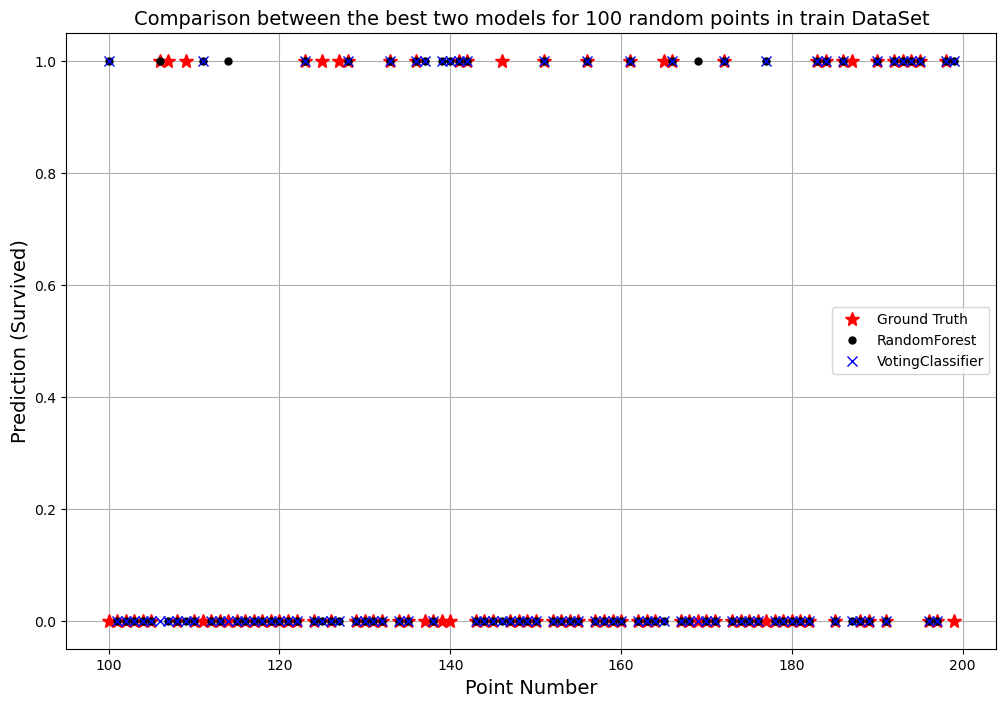

In [48]:
# Plotthe comparison between the best two models (Random Forest & VotingClassifier) with the ground truth (Survived)
x_x = np.arange(100, 200)  # Random selected points
plt.figure(figsize=(12,8))

plt.plot(x_x,y.values[100:200], 'r*', markersize=10, label='Ground Truth')
plt.plot(x_x,y_pred_best_forest[100:200], 'ko',markersize=5,  label='RandomForest')
plt.plot(x_x, y_pred_tuned_voting[100:200], 'bx', markersize=7, label='VotingClassifier')

plt.title('Comparison between the best two models for 100 random points in train DataSet', fontsize=14, c='k')
plt.xlabel('Point Number', fontsize=14, c='k')
plt.ylabel('Prediction (Survived)', fontsize=14, c='k')
plt.legend()
plt.grid('on')
plt.show()

### `Download the best model -- best_forest`

In [49]:
# Download using joblib
joblib.dump(best_forest, 'model_Random_Forest.pkl')

['model_Random_Forest.pkl']

In [50]:
# to load this pretrained model
loaded_model = joblib.load('model_Random_Forest.pkl')

### `Inference on Test DataSet`

In [51]:
path = os.path.join(os.getcwd(),'test.csv')
df_test = pd.read_csv(path)

In [52]:
def preprocessed_new(X_new):
    ''' This Function tries to process the new instances before predicted using the model
    Args:
    *****
        (X_new: 2D array) --> The Features in the same order
                        ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
        Returns:
        *******
        Preprocessed Features ready to make inference by the Model.
    '''
    return total_pipeline.transform(X_new)

In [53]:
# Now we can touch test DataSet using (loaded_model == best_forest) -- tuned Random Forst Model
X_test = preprocessed_new(df_test)
y_pred_test = loaded_model.predict(X_test)

In [60]:
df_test['Survived'] = y_pred_test
Survived = pd.concat([df_test['PassengerId'], df_test['Survived']], axis=1)
Survived.to_csv(os.path.join(os.getcwd(),'Titanic_Survived'))